In [24]:
##Import Necessary Libraries and set Pandas Viewing Options

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import warnings
warnings.simplefilter('ignore')

In [2]:
## Load datasets and concatenate them for efficient preprocessing

train = pd.read_csv('TrainingData.csv')
test = pd.read_csv('testX.csv')

df = pd.concat([train, test], axis = 0)

df.shape

(130000, 53)

In [3]:
df.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10,770,4,3080,0.0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732,437,5,2185,1.0
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89,795,4,3180,1.0
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3,755,4,3020,0.0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5,425,4,1700,0.0


In [4]:
## Renaming all the columns from mvarX to something we could understand
columns = ['ID',
           'Credit Worthiness Score',
           'Number and Riskiness of Credit Enquiry',
           'Default Severity (Any Loan)',
           'Default Severity (Auto Loan)',
           'Default Severity (Education Loan)',
           'Min Cred Available (Revolving Credit Cards)',
           'Max Cred Available (Active Credit Lines)',
           'Max Cred Available (Active Revolving Credit Cards)',
           'Total Available Credit (Cards with 1 missed payment)',
           'Total Credit Available',
           'Dues Collected Post Default',
           'Total Amount Due (Active Cards)',
           'Credit Amount Paid (Prev Year)',
           'Annual Income',
           'Property Value',
           'Full Credit Utilisation (Revolving Credit Cards)',
           'Full Credit Utilisation (Credit Cards)',
           'Full Credit Utilisation (Credit Lines)',
           '>75 percent Credit Utilisation (Credit Cards)',
           '>75 percent Credit Utilisation (Credit Lines)',
           'Average Utilisation (Revolving Credit Cards)',
           'Average Utilisation Last 2 Years (All Credit Lines)',
           'Average Utilisation Last Year (All Credit Cards)',
           'Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards)',
           'Average Tenure (Active Revolving Credit Cards)',
           'Tenure of Oldest Active Credit Card',
           'Tenure of Oldest Active Revolving Credit Card',
           'Days Since Last Missed Payment',
           'Tenure of Oldest Credit Line',
           'Max Tenure (Auto Loans)',
           'Max Tenure (Education Loans)',
           'Sum of Tenures (Active Credit Cards)',
           'Stay Duration of Current Residence',
           'Credit Lines with 1 Missed Payment (Last 6 Months)',
           'Revolving Credit Cards with 1 Missed Payment (Last 2 Years)',
           'Active Credit Lines',
           'Credit Cards with >2Y Tenure',
           'Credit Lines activated Prev 2 Years',
           'Credit Lines with Current Delinquency',
           'Utilization on Active Education Loans',
           'Utilization on Active Auto Loans',
           'Financial Stress Index',
           'Credit Lines with No Missed Payments (Prev 2 Years)',
           'Ratio(Max Amount Due : Sum of Amounts Due)',
           'Mortgage Loans (With 2 Missed Payements)',
           'Auto Loans (With 2 Missed Payments)',
           'Type of Product',
           'Int Value for an Application',
           'Bucketized Credit Worthiness Score',
           'Compound of mvar49 and mvar48',
           'mvar51',
           'default_ind']

df.columns = columns

In [5]:
df.head(10)

,ID,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Type of Product,Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10,770,4,3080,0.0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732,437,5,2185,1.0
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89,795,4,3180,1.0
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3,755,4,3020,0.0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5,425,4,1700,0.0
5,230037,1579,NaN,3.502,0.0,0.0,missing,missing,missing,missing,0,199,missing,missing,77298,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,183,973,missing,missing,missing,1.3333,0,na,2,na,2,na,missing,missing,1.5,0,NaN,na,na,C,35,455,4,1820,1.0
6,230038,1818,0.4001,0.000,0.0,0.0,missing,1088,missing,1536,1498,missing,448,2331,123875,missing,na,0,0,0,0,NaN,NaN,NaN,29.16,1034,760,missing,30386,3437,missing,791,34,9.3333,0,na,2,0,0,0,88.171,missing,0,2,0.87224,na,0,C,2,392,5,1960,1.0
7,230039,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,missing,missing,missing,missing,198200,1263525,na,na,na,0,na,NaN,NaN,NaN,NaN,missing,missing,missing,missing,missing,missing,missing,missing,0.0833,na,na,na,na,na,na,missing,missing,missing,na,NaN,na,na,C,2,615,#VALUE!,#VALUE!,0.0
8,230040,1836,0.1358,0.000,0.0,0.0,347,38964,17828,70729,65843,missing,16298,18877,109010,missing,0,0,0,1,1,32.02,0.00,0.00,

#### We can see here that there are a lot of entries called "missing" or "na" or "#VALUE!" which is probably coming up since excel isn't able to calculate it due to the null values. We replace all these values with NaN values to check how much of the dataset is actually empty

In [6]:
df.replace('missing', np.nan, inplace = True)
df.replace('na', np.nan, inplace = True)
df.replace('#VALUE!', np.nan, inplace = True)

In [7]:
#Check Percentage Null Values
df.isnull().sum() * 100 / len(df)

ID                                                                         0.000000
Credit Worthiness Score                                                    4.585385
Number and Riskiness of Credit Enquiry                                     7.086923
Default Severity (Any Loan)                                                0.637692
Default Severity (Auto Loan)                                               0.637692
Default Severity (Education Loan)                                          0.637692
Min Cred Available (Revolving Credit Cards)                               23.844615
Max Cred Available (Active Credit Lines)                                   9.348462
Max Cred Available (Active Revolving Credit Cards)                        23.854615
Total Available Credit (Cards with 1 missed payment)                      14.226154
Total Credit Available                                                     0.638462
Dues Collected Post Default                                               56

#### We can see that a good number of columns have a really high percentage of missing values, some even going up to 78%. Even though this means a very small amount of information available, we will not drop these columns and instead use the missing values in a way so that the model can learn what to do in instances where the values are missing

In [8]:
## Doing this to avoid multiple entries of the same value in the index because we concatenated Train and Test
df.reset_index(drop = True, inplace = True)

In [9]:
## All the values in the DataFrame as String Values. Converting them to float values.
def convert_to_int(entry):
    return float(entry)

for col in df.columns:
    if col not in ['Type of Product', 'default_ind']:
        df[col] = df[col].apply(convert_to_int)
    
df['Credit Worthiness Score'][0]

1696.0

In [10]:
## Filling Mising Values with -1 since we have a Tree Based Model
df.fillna(-1, inplace = True)

In [11]:
## Checking the Distribution of the Target Column
df['default_ind'].value_counts()

 0.0    59145
-1.0    47000
 1.0    23855
Name: default_ind, dtype: int64

#### -1 indicates that the row belongs to the test set. Barring that we an see that there is a class imbalance in the dataset. In order to tackle this we could either upsample the minority class, downsample the majority class or give a higher class weight to the minority class while training. We tried all the three methods and found the last method to give the most significant results

In [12]:
## Converting this Categorical Column into a Label form
le = LabelEncoder()
df['Type of Product'] = le.fit_transform(df['Type of Product'])

In [13]:
## Removing Blank Spaces from th column names since these models don't work with feature names like that
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [14]:
## Creating the Training X and y variables
train = df.iloc[:83000, :]

drop_cols = ['ID', 'default_ind']

X_data = train.drop(drop_cols, axis = 1)
y_data = train['default_ind']

In [32]:
## Stratified K Folds Training with 5 splits
kfold = StratifiedKFold(random_state = 10, n_splits = 5, shuffle = True)
splits = kfold.split(X_data, y_data)

cat1_acc_scores = []
cat1_f1_scores = []
cat1_models = []

i=1

for Train, Test in splits:
    X_Train, X_Test, Y_Train, Y_Test = X_data.iloc[Train], X_data.iloc[Test], y_data.iloc[Train], y_data.iloc[Test]
    
    cat1 = CatBoostClassifier(n_estimators = 10000, max_depth = 8, eval_metric = 'CrossEntropy',
                              bootstrap_type='Bernoulli', learning_rate = 0.01, random_state = 0,
                              early_stopping_rounds = 1000, scale_pos_weight = 59145/23855)
    
    cat1.fit(X_Train, Y_Train, eval_set = [(X_Train, Y_Train), (X_Test, Y_Test)], verbose = False)
    
    pred = cat1.predict(X_Test)
    
    cat1_f1_scores.append(f1_score(Y_Test, pred))
    cat1_acc_scores.append(accuracy_score(Y_Test, pred)*100)
    cat1_models.append(cat1)
    
    
    print("Iteration {} Completed".format(i))
    i+=1

Iteration 1 Completed
Iteration 2 Completed
Iteration 3 Completed
Iteration 4 Completed
Iteration 5 Completed


In [33]:
## Printing Evaluation Metrics obtained
print("CAT F1 Score: ", sum(cat1_f1_scores)/len(cat1_f1_scores))
print("CAT Accuracy: ", sum(cat1_acc_scores)/len(cat1_acc_scores), "%")

CAT F1 Score:  0.5958727367149146
CAT Accuracy:  73.22048192771084 %


Text(0.5, 1.0, 'Feature Importance')

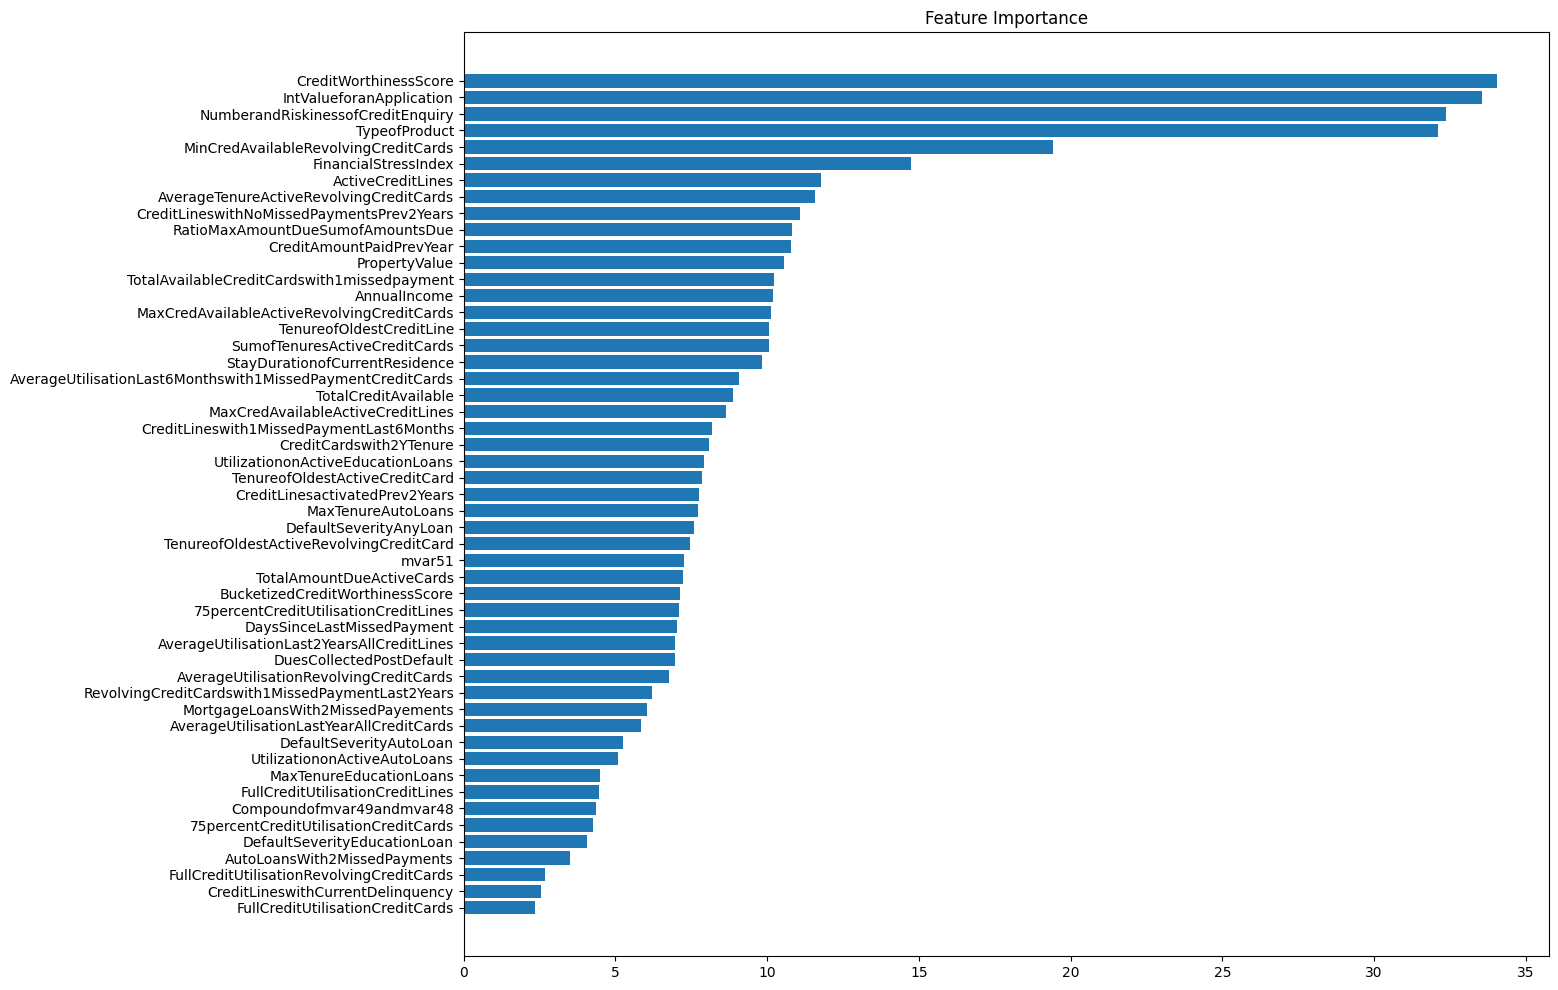

In [28]:
## Getting the Feature Importance to see which features were the most important in predicting our outcome
feature_importance = [cat1_models[0].feature_importances_ +
                      cat1_models[1].feature_importances_ +
                      cat1_models[2].feature_importances_ +
                      cat1_models[3].feature_importances_ +
                      cat1_models[4].feature_importances_]
sorted_idx = np.argsort(feature_importance[0])
fig = plt.figure(figsize=(14, 12))
plt.barh(range(len(sorted_idx)), feature_importance[0][sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_data.columns)[sorted_idx])
plt.title('Feature Importance')

In [18]:
## Making the X for the test set
test = df.iloc[83000:, :]
test = test.drop(drop_cols, axis = 1)

In [19]:
## Making Predictions on the Test Set
preds = np.argmax(cat1_models[0].predict_proba(test) +
                  cat1_models[1].predict_proba(test) +
                  cat1_models[2].predict_proba(test) +
                  cat1_models[3].predict_proba(test) +
                  cat1_models[4].predict_proba(test), axis = 1)

In [20]:
## Loading the Sample Submission file to add in the predictions to the necessary column
sample = pd.read_csv('submission.csv', header = None)
sample.head()

,0,1
0,578069,0
1,578070,1
2,578071,1
3,578072,1
4,578073,0


In [21]:
## Adding in our predictions to the required column
sample[1] = preds
sample.head()

,0,1
0,578069,0
1,578070,0
2,578071,0
3,578072,1
4,578073,1


In [22]:
## Checking the Distribution of the Predictions
sample[1].value_counts()

0    28409
1    18591
Name: 1, dtype: int64

In [23]:
##Line is commented out to prevent overwriting of any submission, please uncomment the line should you wish to save the solution
#sample.to_csv('Submissions/ThirdDegreeBurn.csv', index = False, header=False)